In [4]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# get input data
#
dataset_name = "criotherapy"
#dataset_name = "kr-vs-kp"
#dataset_name = "salud-covid"
df = pd.read_csv(f'./battery_{dataset_name}.csv')
df.head()

,ensemble_criterion,chi_square_percent_point_function,scale_feature_coefficient,min_accuracy_coefficient,min_number_class_per_node,sorting_method,dataset_test_size,dataset_test_categorizable,number_of_rules,cobertura,...,RuleCOSI_accuracy,RuleCOSI_f1_score,RuleCOSI_precision_score,RuleCOSI_recall_score,RuleCOSI_roc_auc_score,rules_accuracy,rules_f1_score,rules_precision_score,rules_recall_score,rules_roc_auc_score
0,gini,0.950,0.01,0.85,1,target_accuracy,9,9,0,1.0,...,0.7777777777777778,0.6666666666666666,1.0,0.5,0.75,0.6666666666666666,0.571429,0.666667,0.5,0.65
1,gini,0.970,0.01,0.85,1,target_accuracy,9,9,0,1.0,...,0.7777777777777778,0.6666666666666666,1.0,0.5,0.75,0.6666666666666666,0.571429,0.666667,0.5,0.65
2,gini,0.980,0.01,0.85,1,target_accuracy,9,9,0,1.0,...,0.7777777777777778,0.6666666666666666,1.0,0.5,0.75,0.6666666666666666,0.571429,0.666667,0.5,0.65
3,gini,0.990,0.01,0.85,1,target_accuracy,9,9,0,1.0,...,0.7777777777777778,0.6666666666666666,1.0,0.5,0.75,0.6666666666666666,0.571429,0.666667,0.5,0.65
4,gini,0.995,0.01,0.85,1,target_accuracy,9,9,0,1.0,...,0.7777777777777778,0.6666666666666666,1.0,0.5,0.75,0.6666666666666666,0.571429,0.666667,0.5,0.65


In [5]:

print(type(df))
grouped_df = df.groupby(by=['ensemble_criterion', 'chi_square_percent_point_function','scale_feature_coefficient', 'min_accuracy_coefficient', 'min_number_class_per_node', 'sorting_method'], level=0)
grouped_df.head()

<class 'pandas.core.frame.DataFrame'>


,ensemble_criterion,chi_square_percent_point_function,scale_feature_coefficient,min_accuracy_coefficient,min_number_class_per_node,sorting_method,dataset_test_size,dataset_test_categorizable,number_of_rules,cobertura,...,RuleCOSI_accuracy,RuleCOSI_f1_score,RuleCOSI_precision_score,RuleCOSI_recall_score,RuleCOSI_roc_auc_score,rules_accuracy,rules_f1_score,rules_precision_score,rules_recall_score,rules_roc_auc_score
0,gini,0.950,0.01,0.85,1,target_accuracy,9,9,0,1.0,...,0.7777777777777778,0.6666666666666666,1.0,0.5,0.75,0.6666666666666666,0.571429,0.666667,0.5,0.65
1,gini,0.970,0.01,0.85,1,target_accuracy,9,9,0,1.0,...,0.7777777777777778,0.6666666666666666,1.0,0.5,0.75,0.6666666666666666,0.571429,0.666667,0.5,0.65
2,gini,0.980,0.01,0.85,1,target_accuracy,9,9,0,1.0,...,0.7777777777777778,0.6666666666666666,1.0,0.5,0.75,0.6666666666666666,0.571429,0.666667,0.5,0.65
3,gini,0.990,0.01,0.85,1,target_accuracy,9,9,0,1.0,...,0.7777777777777778,0.6666666666666666,1.0,0.5,0.75,0.6666666666666666,0.571429,0.666667,0.5,0.65
4,gini,0.995,0.01,0.85,1,target_accuracy,9,9,0,1.0,...,0.7777777777777778,0.6666666666666666,1.0,0.5,0.75,0.6666666666666666,0.571429,0.666667,0.5,0.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13495,gini,0.950,0.40,0.95,10,target_accuracy,9,2,0,0.2222222222222222,...,1.0,1.0,1.0,1.0,0.00,1.0,1.000000,1.000000,1.0,0.00
13496,gini,0.970,0.40,0.95,10,NaN,9,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13497,gini,0.980,0.40,0.95,10,NaN,9,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13498,gini,0.990,0.40,0.95,10,NaN,9,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


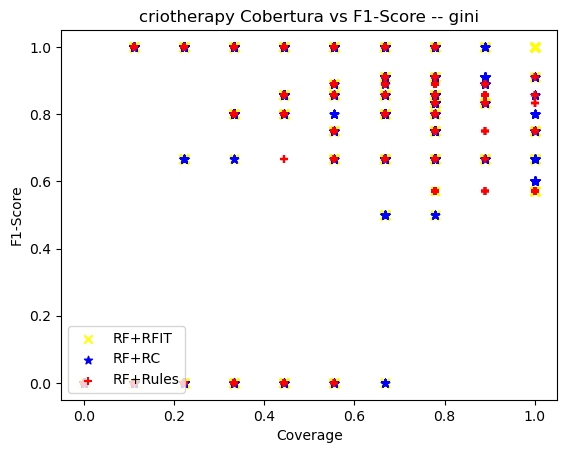

In [6]:

for node_value in df["ensemble_criterion"].unique():
       fig, ax = plt.subplots()
       new_df = df.query(f'ensemble_criterion == \"{node_value}\"')
       
       
       grouped_df =  new_df.groupby(by=['ensemble_criterion', 'chi_square_percent_point_function','scale_feature_coefficient', 'min_accuracy_coefficient', 'min_number_class_per_node', 'sorting_method'], level=0)
       #ax.scatter(grouped_df[" cobertura"], grouped_df[" ensemble_f1_score"], color="green", label="RF", marker=".")
       #ax.scatter(grouped_df[" cobertura"], grouped_df[" tree_f1_score"], color="blue", label="tree_f1_score", marker="x")
       

       
       ax.scatter(grouped_df[" cobertura"].mean(), grouped_df[" RuleFit_f1_score"].mean(), color="yellow", label="RF+RFIT", marker="x")
       ax.scatter(grouped_df[" cobertura"].mean(), grouped_df[" RuleCOSI_f1_score"].mean(), color="blue", label="RF+RC", marker="*")
       ax.scatter(grouped_df[" cobertura"].mean(), grouped_df[" rules_f1_score"].mean(), color="red", label="RF+Rules", marker="+")
       ax.set(
              xlabel='Coverage',
              ylabel='F1-Score',
              title=f'{dataset_name} Cobertura vs F1-Score -- {node_value}')
       plt.legend(loc="lower left")
       #plt.ylim(0, 1.1)
       #plt.xlim(0, 1.1)
       plt.show()